# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
#!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

In [2]:
#!gunzip SUSY.csv.gz

In [5]:
ls -lh

total 2.3G
drwxrwxr-x 5 cpham cpham 4.0K Feb 16 11:29 DATA3402.Spring.2024/
-rw-rw-r-- 1 cpham cpham  34K Feb 23 23:39 DATA3402Lab.3_solutions.ipynb
-rw-rw-r-- 1 cpham cpham  26K Mar 28 20:01 DATA3402_lab2.ipynb
-rw-rw-r-- 1 cpham cpham  66K Mar  1 22:16 Lab.4.ipynb
-rw-rw-r-- 1 cpham cpham  27K Mar 22 20:54 Lab.5.ipynb
-rw-rw-r-- 1 cpham cpham  63K Mar 29 23:24 Lab.6.ipynb
-rw-rw-r-- 1 cpham cpham 1.3M Apr  5 21:31 Lab.7.ipynb
-rw-rw-r-- 1 cpham cpham    0 Mar 28 18:28 Lab.7.ipynb.invalid
-rw-rw-r-- 1 cpham cpham 133K Mar  8 07:34 Lecture.10.b.ipynb
-rw-rw-r-- 1 cpham cpham  46K Feb  8 13:00 Lecture.3.ipynb
-rw-rw-r-- 1 cpham cpham  59K Feb 16 11:14 Lecture.5.ipynb
-rw-rw-r-- 1 cpham cpham 2.3G Mar 22 11:37 SUSY.csv
-rw-rw-r-- 1 cpham cpham   14 Mar  1 22:12 Test.foo
drwxrwxr-x 2 cpham cpham 4.0K Mar  1 18:38 __pycache__/
-rw-rw-r-- 1 cpham cpham   20 Mar  1 22:01 my_drawing.txt
-rw-rw-r-- 1 cpham cpham 7.8K Mar  1 22:16 paint.py
-rw-rw-r-- 1 cpham cpham  11K Mar  1 18:33 paint_code.i

The data is provided as a comma separated file.

In [6]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [7]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [8]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [9]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [10]:
FeatureNames

['M_TR_2',
 'cos_theta_r1',
 'MET_rel',
 'axial_MET',
 'MT2',
 'M_Delta_R',
 'M_R',
 'S_R',
 'R',
 'dPhi_r_b']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [12]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [13]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [14]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


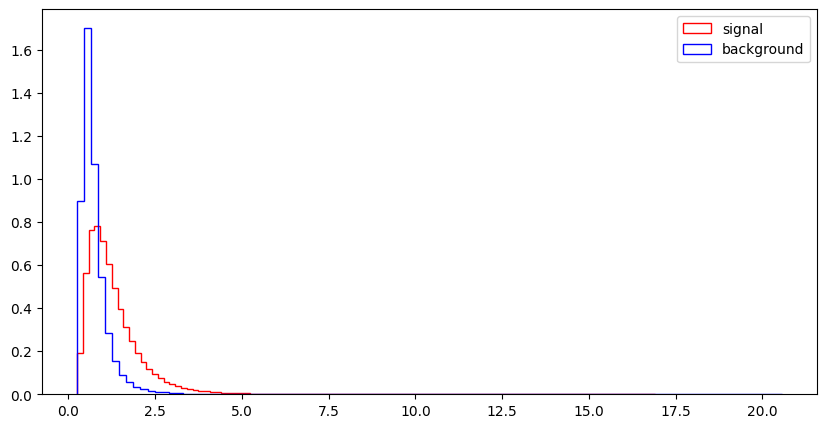

l_1_eta


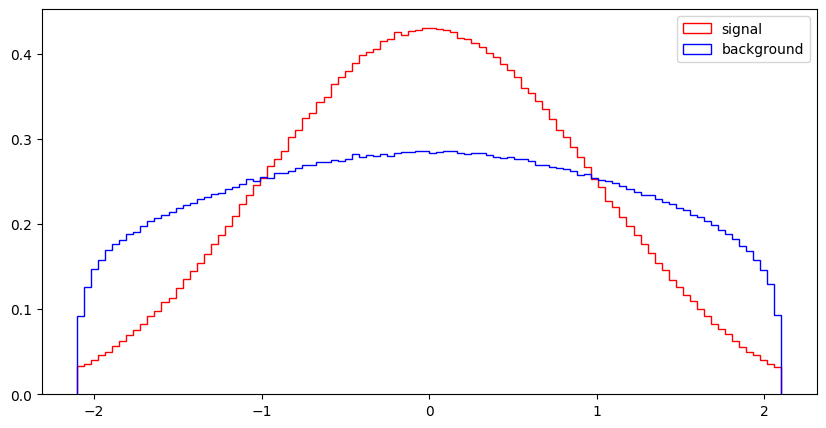

l_1_phi


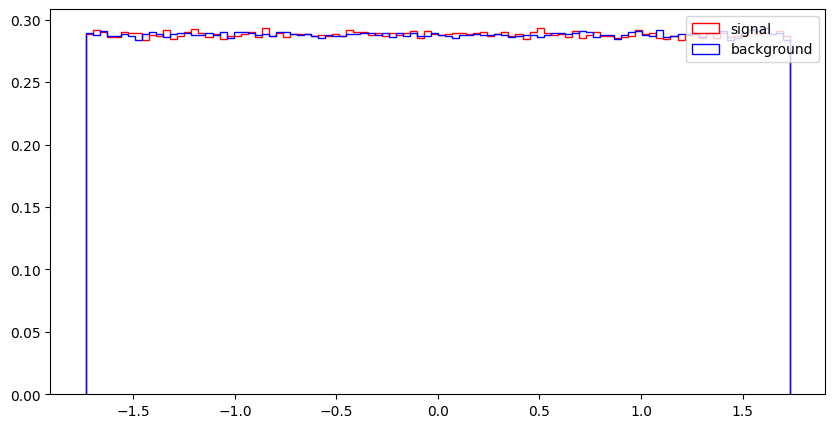

l_2_pT


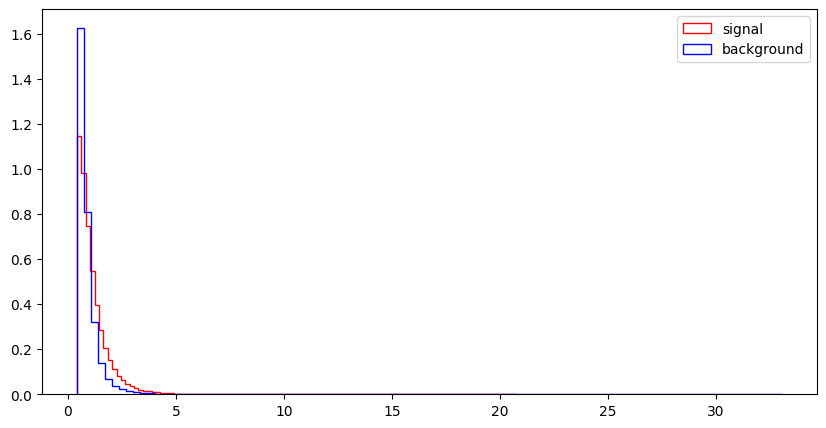

l_2_eta


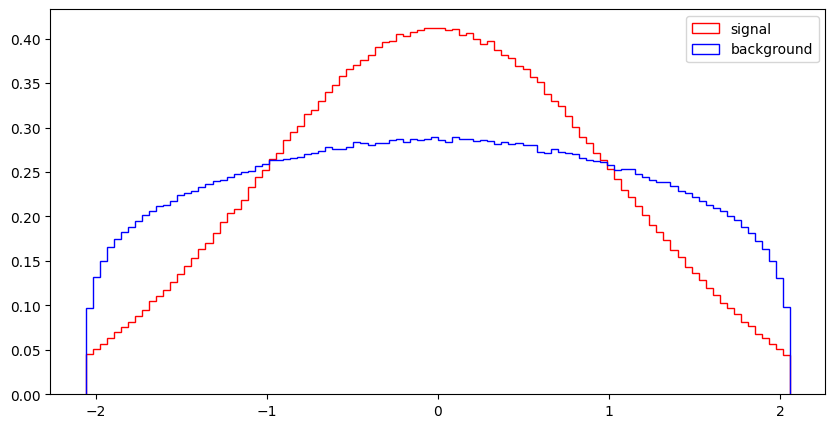

l_2_phi


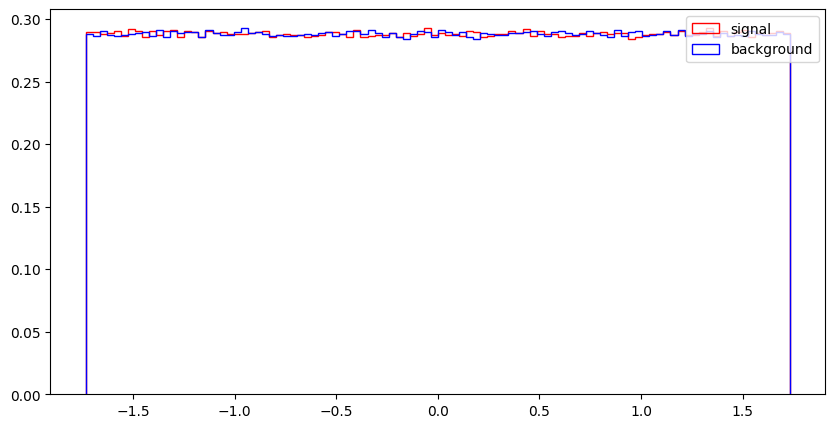

MET


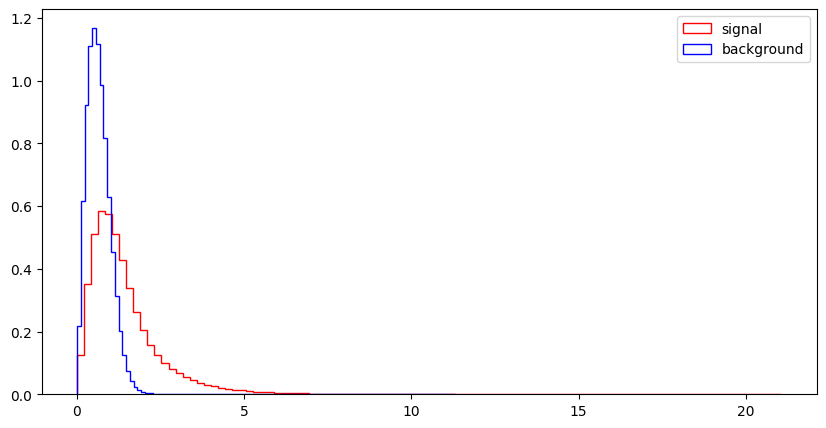

MET_phi


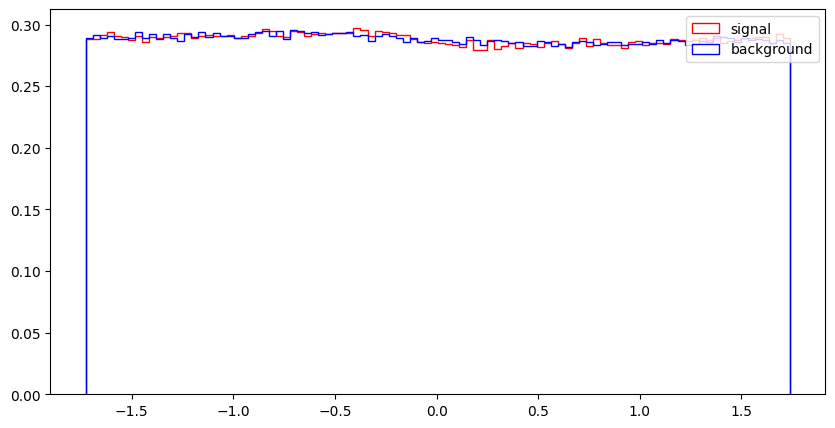

MET_rel


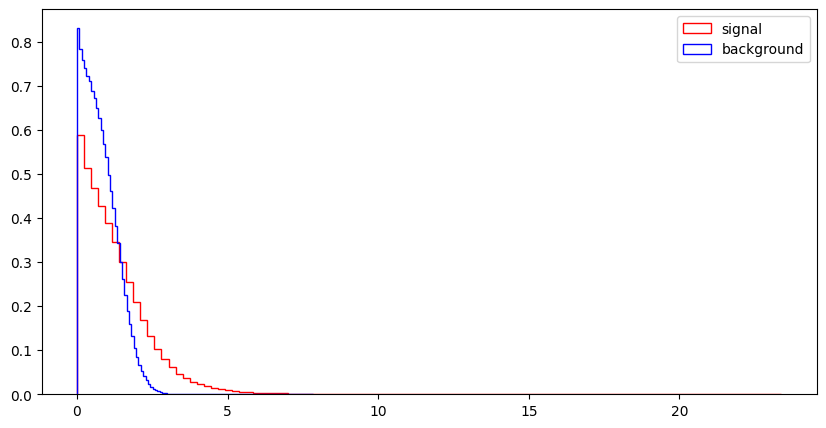

axial_MET


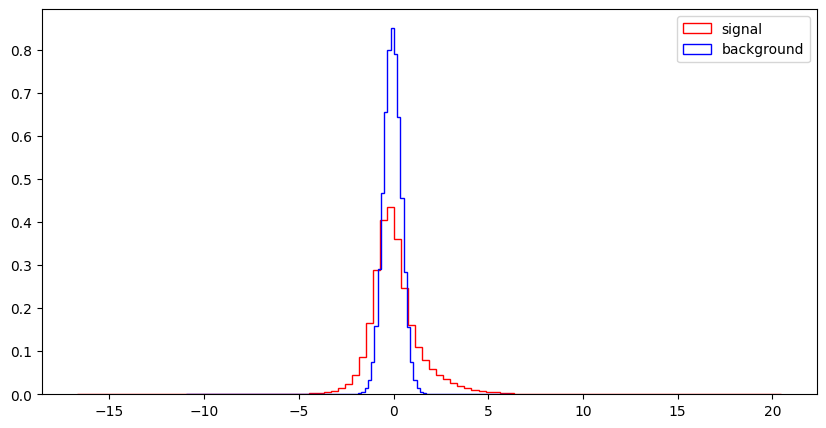

M_R


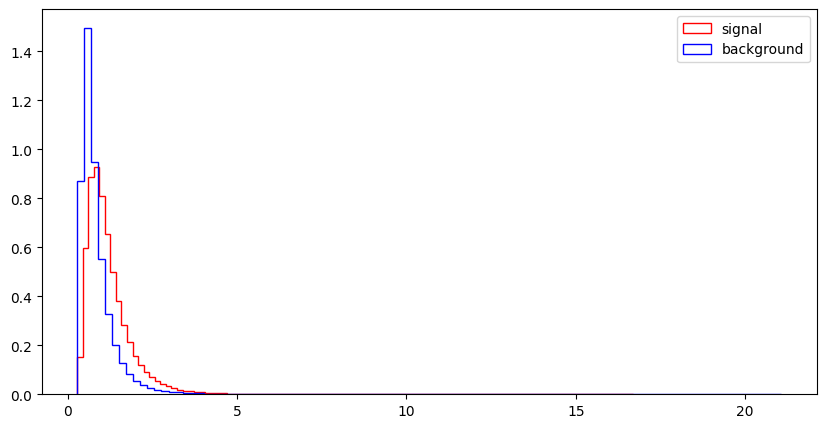

M_TR_2


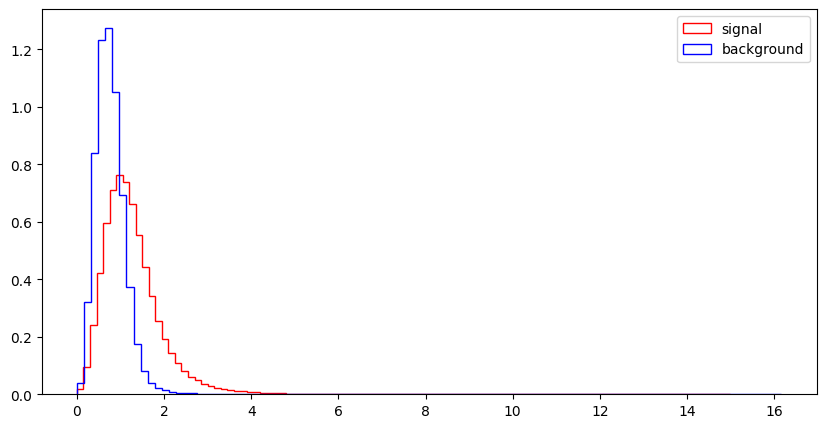

R


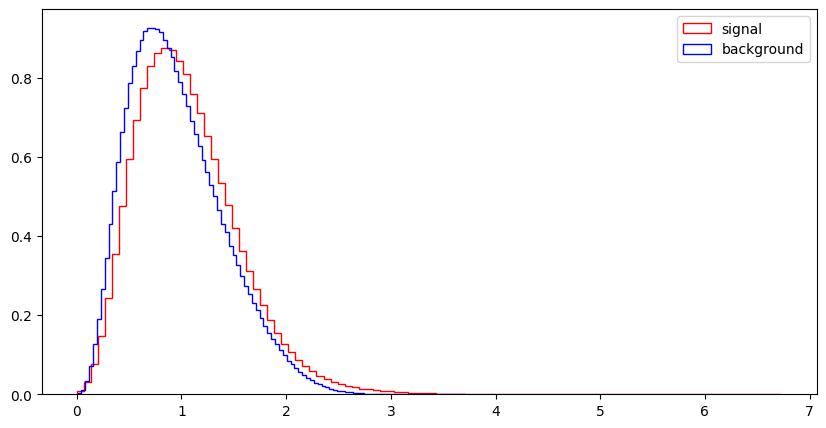

MT2


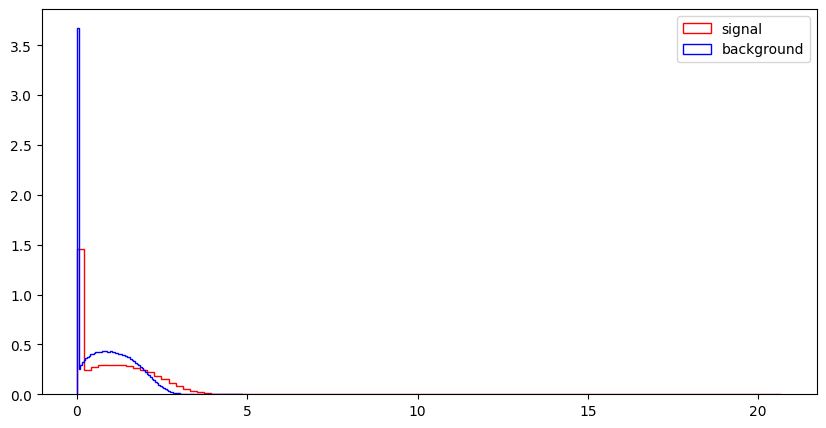

S_R


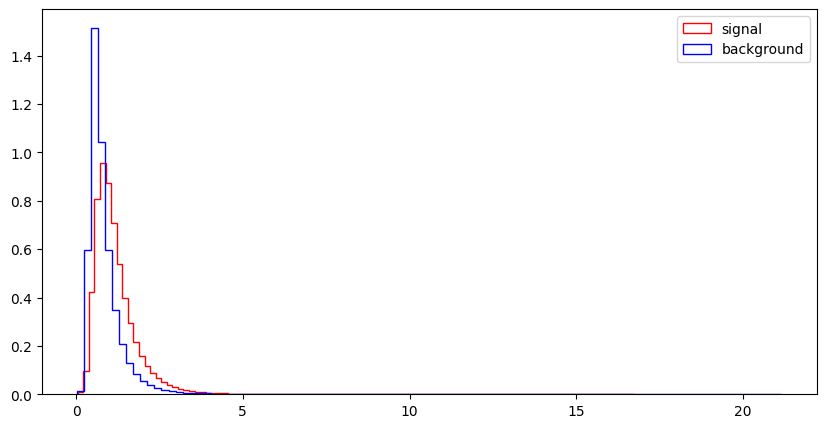

M_Delta_R


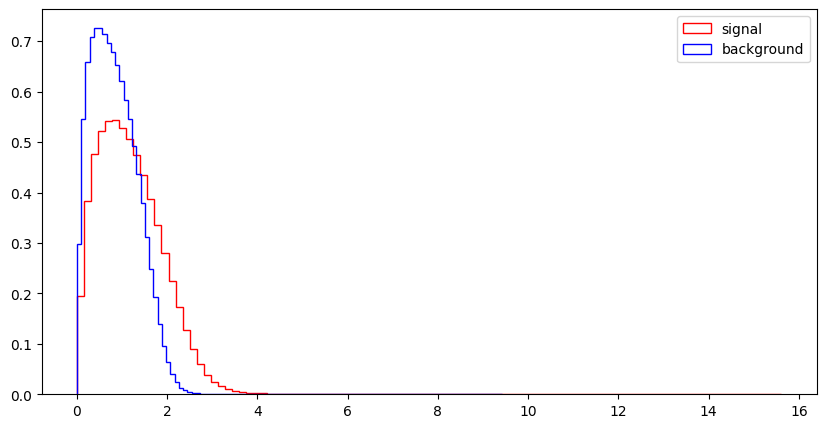

dPhi_r_b


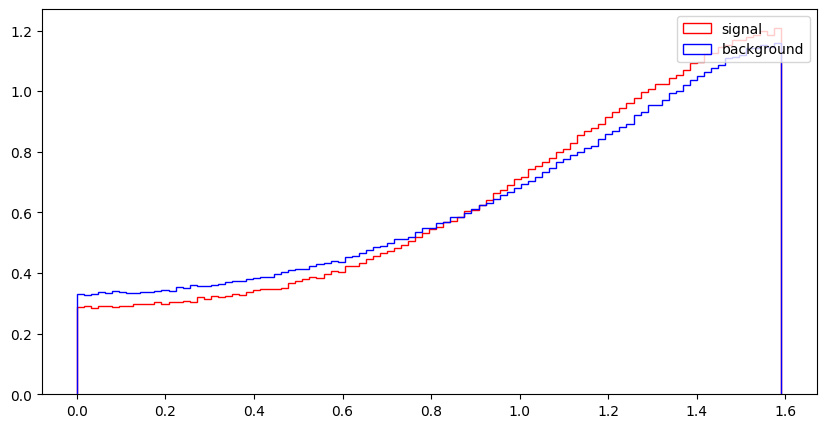

cos_theta_r1


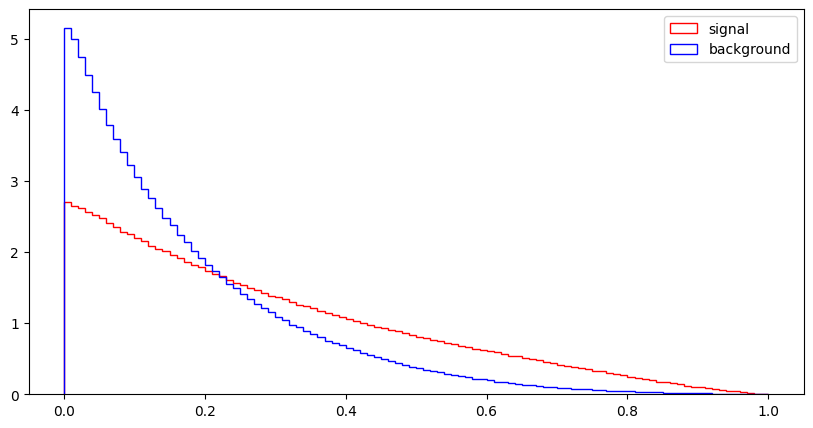

In [15]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

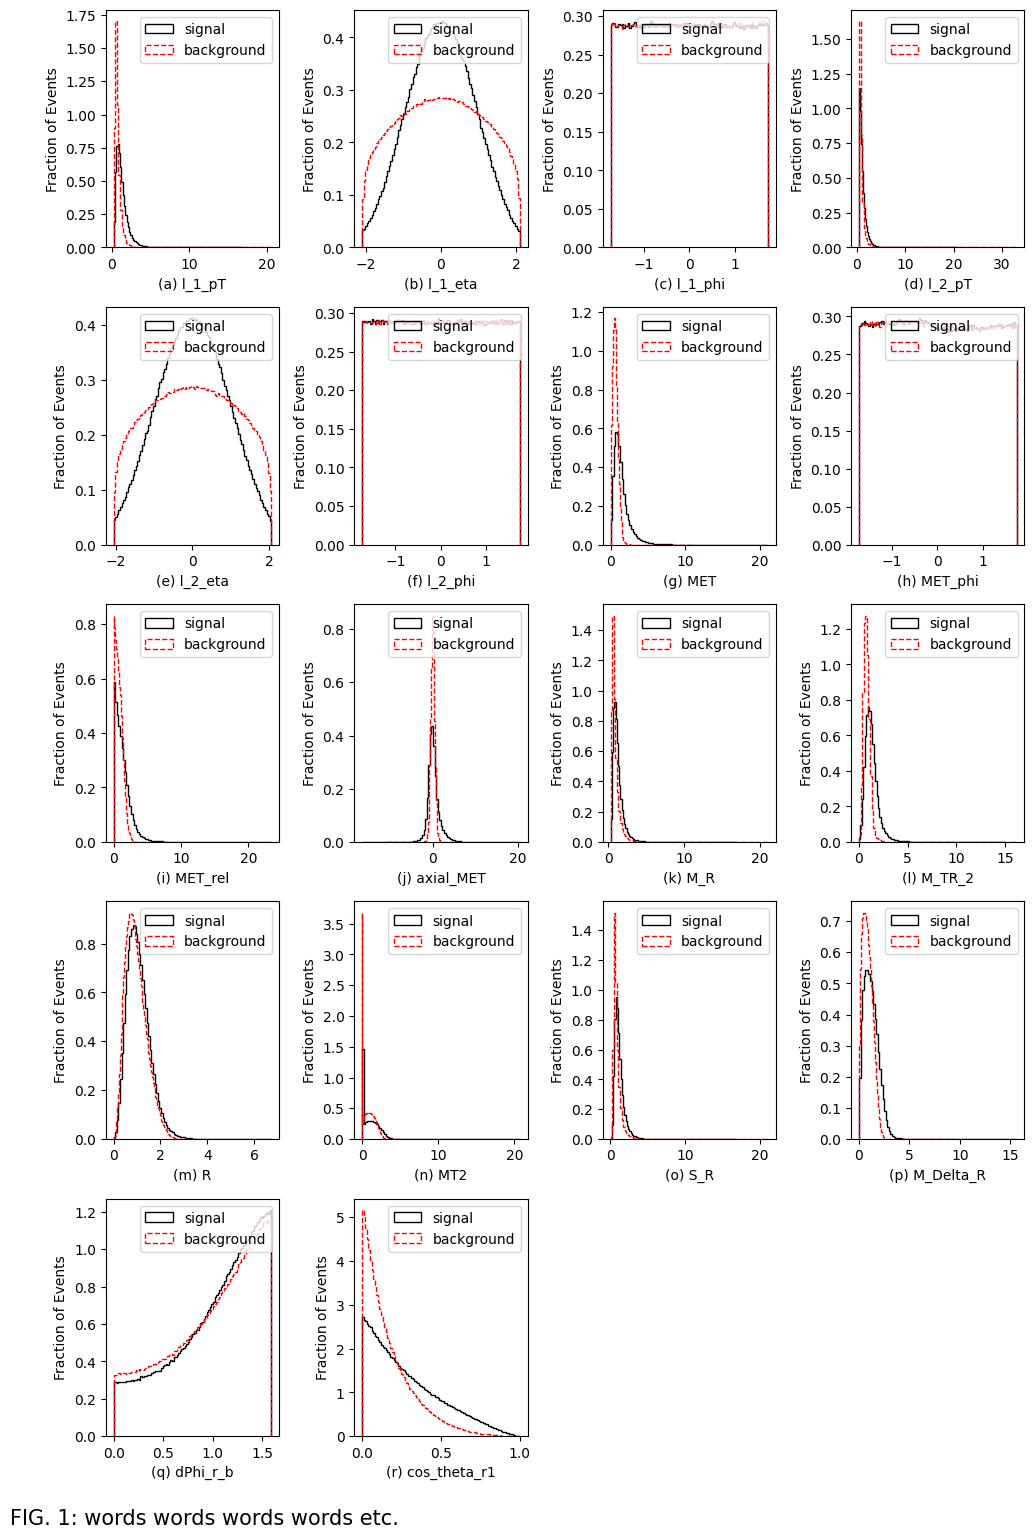

In [16]:
letters=["(a)","(b)","(c)","(d)","(e)","(f)","(g)","(h)","(i)","(j)","(k)","(l)","(m)","(n)","(o)","(p)","(q)","(r)"]
plt.figure(figsize=(10,15))

for i,var in enumerate(VarNames[1:]):
    plt.subplot(5,4,i+1)
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="black",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="red", linestyle="--", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.xlabel(f"{letters[i]} {var}")
    plt.ylabel("Fraction of Events")
plt.tight_layout()
plt.text(-1,-2,"\nFIG. 1: words words words words etc.",fontsize=15,ha="center")
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY and Higgs samples, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

In [17]:
# part a

def pairplot_a(matrix1, matrix2, vars=None, figsize=(10, 10), marker='o', color1='b', color2='r', alpha=0.5):
    if vars is None:
        vars = matrix1.select_dtypes(include=['number']).columns.tolist()

    num_vars = len(vars)

    fig,axes = plt.subplots(num_vars, num_vars, figsize=figsize)

    for i, var1 in enumerate(vars):
        for j, var2 in enumerate(vars):
            if i == j:
                axes[i,j].hist(matrix1[var1], bins=20, color=color1, alpha=alpha)
                axes[i,j].hist(matrix2[var1], bins=20, color=color2, alpha=alpha)
                axes[i,j].set_xlabel(var1)
                axes[i,j].set_ylabel('Frequency')
            else:
                axes[i,j].scatter(matrix1[var2], matrix1[var1], marker=marker, color=color1, alpha=alpha)
                axes[i,j].scatter(matrix2[var2], matrix2[var1], marker=marker, color=color2, alpha=alpha)
                axes[i,j].set_xlabel(var2)
                axes[i,j].set_ylabel(var1)

    plt.tight_layout()
    plt.show()

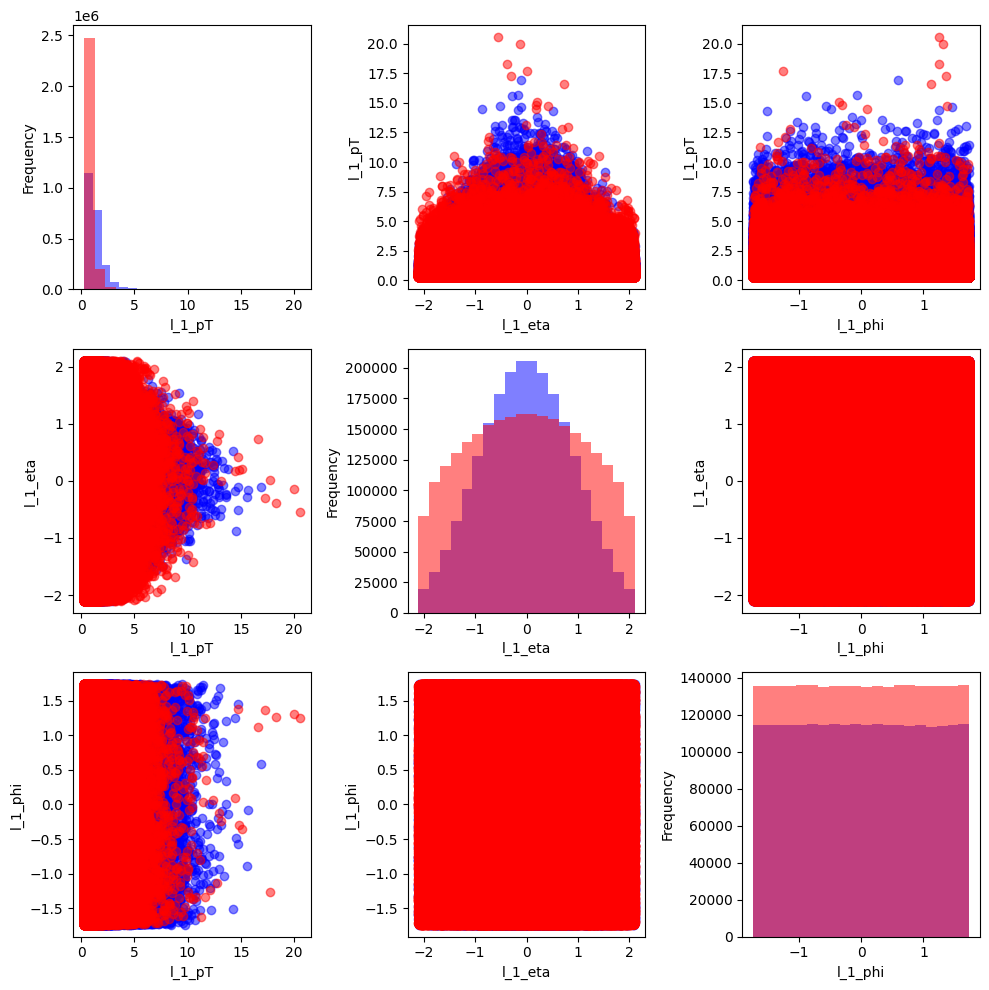

In [18]:
pairplot_a(df_sig, df_bkg, vars=["l_1_pT", "l_1_eta","l_1_phi"])
## crashes when i use too many variables

In [1]:
# part b

def pairplot_b(matrix1, matrix2, vars=None, figsize=(10, 10), marker='o', color1='b', color2='r', alpha=0.5):
  if vars is None:
    vars = matrix1.select_dtypes(include=['number']).columns.tolist()

  num_vars = len(vars)

  fig, axes = plt.subplots(num_vars, num_vars, figsize=figsize)

  # Pre-compute histograms for faster plotting
  hists = {}
  for var in vars:
    counts1, bins1 = np.histogram(matrix1[var], bins=20)
    counts2, bins2 = np.histogram(matrix2[var], bins=20)
    hists[var] = (counts1, bins1)
    hists[var] = (counts2, bins2)

  for i, var1 in enumerate(vars):
    for j, var2 in enumerate(vars):
      if i == j:
        # Use ax.hist with unpacked data (counts & bins)
        axes[i, j].hist(matrix1[var1], bins=hists[var1][1], color=color1, alpha=alpha)  # Add color to histogram
        axes[i, j].hist(matrix2[var1], bins=hists[var1][1], color=color2, alpha=alpha)
        axes[i, j].set_xlabel(var1)
        axes[i, j].set_ylabel('Frequency')
      else:
        axes[i, j].scatter(matrix1[var2], matrix1[var1], marker=marker, color=color1, alpha=alpha)
        axes[i, j].scatter(matrix2[var2], matrix2[var1], marker=marker, color=color2, alpha=alpha)
        axes[i, j].set_xlabel(var2)
        axes[i, j].set_ylabel(var1)

  plt.tight_layout()
  plt.show()


In [2]:
pairplot_b(df_sig, df_bkg, vars=["l_1_pT","l_1_eta","l_1_phi","cos_theta_r1"])

NameError: name 'df_sig' is not defined

In [21]:
# part c
## cos_theta_r1 and l_1_pT

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [22]:
# part a

#pip install tabulate

Hint: Example code for embedding a `tabulate` table into a notebook:

In [23]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


In [ ]:
# part b

## RawNames: low level
## FeatureNames: High level
low_l = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_l = ['axial_MET', 'S_R', 'MT2', 'M_Delta_R', 'MET_rel', 'R', 'cos_theta_r1', 'M_TR_2', 'M_R', 'dPhi_r_b']
all_l=low_l+high_l

# all features
all_cov = np.cov(df[all_l], rowvar=False)
all_corr = np.corrcoef(df[all_l], rowvar=False)

# low level features
low_cov = np.cov(df[low_l], rowvar=False)
low_corr = np.corrcoef(df[low_l], rowvar=False)

# high level features
high_cov = np.cov(df[high_l], rowvar=False)
high_corr = np.corrcoef(df[high_l], rowvar=False)


print("Covariance Matrix (All Features):\n", all_cov)
print("\nCorrelation Matrix (All Features):\n", all_corr)

print("\n\nCovariance Matrix (Low Level):\n", low_cov)
print("\nCorrelation Matrix (Low Level):\n", low_corr)

print("\n\nCovariance Matrix (High Level):\n", high_cov)
print("\nCorrelation Matrix (High Level):\n", high_corr)

In [ ]:
# part c 

##(all_cov)
print("All Covariance - Low Level and High Level Features")
display(HTML(tabulate.tabulate(all_cov, tablefmt='html', headers=all_l, showindex=all_l)))

print(" \n")

##(all_corr)
print("All Correlation - Low Level and High Level Features")
display(HTML(tabulate.tabulate(all_corr, tablefmt='html', headers=all_l, showindex=all_l)))

In [ ]:
# part c 

##(low_cov)
print("Covariance - Low Level Features")
display(HTML(tabulate.tabulate(low_cov, tablefmt='html', headers=low_l, showindex=low_l)))

print(" \n")

##(low_corr)
print("Correlation - Low Level Features")
display(HTML(tabulate.tabulate(low_corr, tablefmt='html', headers=low_l, showindex=low_l)))

In [ ]:
# part c 

##(high_cov)
print("Covariance - Low Level Features")
display(HTML(tabulate.tabulate(high_cov, tablefmt='html', headers=high_l, showindex=high_l)))

print(" \n")

##(high_corr)
print("Correlation - Low Level Features")
display(HTML(tabulate.tabulate(high_corr, tablefmt='html', headers=high_l, showindex=high_l)))

In [ ]:
# part d

def cov_corr(matrix1, low_level_features, high_level_features):
    
    # all features
    all_features = low_level_features+high_level_features
    all_cov = np.cov(df[all_features], rowvar=False)
    all_corr = np.corrcoef(df[all_features], rowvar=False)
        ##(all_cov)
    print("Covariance - Low Level and High Level Features")
    display(HTML(tabulate.tabulate(all_cov, tablefmt='html', headers=all_l, showindex=all_l)))
        ##(all_corr)
    print("Correlation - Low Level and High Level Features")
    display(HTML(tabulate.tabulate(all_corr, tablefmt='html', headers=all_l, showindex=all_l)))

    print(" \n")
    
    # low level features
    low_cov = np.cov(df[low_level_features], rowvar=False)
    low_corr = np.corrcoef(df[low_level_features], rowvar=False)
        ##(low_cov)
    print("Covariance - Low Level Features")
    display(HTML(tabulate.tabulate(low_cov, tablefmt='html', headers=low_l, showindex=low_l)))
        ##(low_corr)
    print("Correlation - Low Level Features")
    display(HTML(tabulate.tabulate(low_corr, tablefmt='html', headers=low_l, showindex=low_l)))
   
    print(" \n")
    
    # high level features
    high_cov = np.cov(df[high_level_features], rowvar=False)
    high_corr = np.corrcoef(df[high_level_features], rowvar=False)
        ##(high_cov)
    print("Covariance - High Level Features")
    display(HTML(tabulate.tabulate(high_cov, tablefmt='html', headers=high_l, showindex=high_l)))    
        ##(high_corr)
    print("Correlation - High Level Features")
    display(HTML(tabulate.tabulate(high_corr, tablefmt='html', headers=high_l, showindex=high_l)))

In [ ]:
low_l = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_l = ['axial_MET', 'S_R', 'MT2', 'M_Delta_R', 'MET_rel', 'R', 'cos_theta_r1', 'M_TR_2', 'M_R', 'dPhi_r_b']
cov_corr(df, low_l, high_l)

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [ ]:
# 5.1

### 1. $x > x_c$  --> signal > background: l_1_pT l_2_pT, MET, MET_rel, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, cos_theta_r1
### 2. $x < x_c$  --> signal < background: n/a
### 3. $|x - \mu| > x_c$ --> signal wider than background: axial_MET
### 4. $|x - \mu| < x_c$ --> signal thinner than background: l_1_eta, l_2_eta

def compute_rate_1(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

def compute_rate_2(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist) * (bins_[1]-bins_[0])
    return R,bins_


plt.hist(df_bkg["l_1_eta"],label="background")
plt.hist(df_sig["l_1_eta"],label="signal")
plt.legend()

In [ ]:
# 5.2

for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    _=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step")
    TPR,bins_sig,_=plt.hist(df_sig[var],bins=100,histtype="step",cumulative=-1,density=True)
    FPR,bins_sig,_=plt.hist(df_bkg[var],bins=bins_sig,histtype="step",cumulative=-1,density=True)
    plt.plot(FPR,TPR)
    plt.legend(loc='upper right')
    plt.show()   

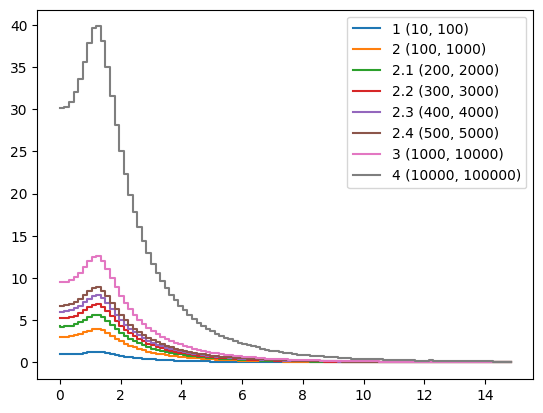

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.363213,0.0469801,3.63213,4.69801,1.25845,1.35029,9
2,100,1000,0.363213,0.0469801,36.3213,46.9801,3.97956,1.35029,9
2.1,200,2000,0.363213,0.0469801,72.6426,93.9601,5.62795,1.35029,9
2.2,300,3000,0.363213,0.0469801,108.964,140.94,6.8928,1.35029,9
2.3,400,4000,0.363213,0.0469801,145.285,187.92,7.95912,1.35029,9
2.4,500,5000,0.363213,0.0469801,181.606,234.9,8.89857,1.35029,9
3,1000,10000,0.363213,0.0469801,363.213,469.801,12.5845,1.35029,9
4,10000,100000,0.363213,0.0469801,3632.13,4698.01,39.7956,1.35029,9


In [72]:
# 5.3

def compare_significance(df_sig, df_bkg,
                         obs_name,
                         scenarios,bins=100,log=False):
        
    TPR,bins_sig = compute_rate(df_sig[obs_name],bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[obs_name],bins=bins_sig)
    
    max_sigs=dict()
    table=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))
    
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected, 
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs



scenarios = { "1": (10,100), 
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(df_sig,df_bkg,"M_TR_2",scenarios)

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [3]:
# 6.1

xc=1.35029

obs= ['MET','M_Delta_R','dPhi_r_b']

In [ ]:
### 6.2

def compute_significance(N_S, N_B):
    return N_S / (N_S + N_B) ** 0.5

cut_flow={}

for o in obs:
    obs_cut = df_sig[o] > xc
    for oc in obs_cut:
        N_S = sum(oc)
        N_B = sum(df_bkg[o] > threshold)
        eff_S = N_S / len(df_sig)
        eff_B = N_B / len(df_bkg)
        sigma_S = compute_significance(N_S, N_B)
        
        cut_flow_results[oc] = {'Signal Efficiency': eff_S,
                                'Background Efficiency': eff_B,
                                'Number of Selected Signal Events': N_S,
                                'Number of Selected Background Events': N_B,
                                'Significance': sigma_S}

# tabulate
table = []
for key, value in cut_flow_results.items():
    observable, cut = key
    row = [observable, cut, value['Signal Efficiency'], value['Background Efficiency'], value['Number of Selected Signal Events'], value['Number of Selected Background Events'], value['Significance']]
    table.append(row)
headers = ["Observable", "Cut", "Signal Efficiency", "Background Efficiency", "Number of Selected Signal Events", "Number of Selected Background Events", "Significance"]
table_str = tabulate(table, headers=headers, tablefmt="grid"
print(table_str)

In [ ]:
# 6.3

plt.scatter(df_sig["M_Delta_R"],df_sig["M_TR_2"],label="Signal")
plt.xlabel("M_Delta_R")
plt.ylabel("M_TR_2")
plt.scatter(df_bkg["M_Delta_R"],df_bkg["M_TR_2"],label="Background")
plt.legend()

## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [ ]:
# 7.1
def compute_rate(d,bins=100):
    hist,bins_=np.histogram(d,bins=bins,density=True)
    R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
    return R,bins_

def AUC(TPR,FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2)

In [ ]:
TPR,bins=compute_rate(df_sig["M_TR_2"])
FPR,bins=compute_rate(df_bkg["M_TR_2"],bins=bins)

plt.plot(bins[:-1],TPR,label="TPR")
plt.plot(bins[:-1],FPR,label="FPR")
plt.legend()

In [ ]:
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.plot([0,1],[0,1])

In [ ]:
# 7.2

def plot_roc_curve(df_sig, df_bkg, observations, bins=100, cumulative=-1, density=True, figsize=(8, 6), title=None):
    plt.figure(figsize=figsize)
    for observation in observations:
        # Compute ROC curve
        TPR, bins_sig, _ = plt.hist(df_sig[observation], bins=bins, histtype="step", cumulative=cumulative, density=density)
        FPR, _, _ = plt.hist(df_bkg[observation], bins=bins_sig, histtype="step", cumulative=cumulative, density=density)
        # Compute AUC
        roc_auc = auc(FPR, TPR)
        # Plot ROC curve
        plt.plot(FPR, TPR, label=f'{observation} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    if title:
        plt.title(title)
    plt.show()

def create_cut_flow_table(df_sig, df_bkg, observations, threshold):
    results = {}
    for observation in observations:
        # Apply selection
        mask_sig = df_sig[observation] > threshold
        mask_bkg = df_bkg[observation] > threshold
        N_S = sum(mask_sig)
        N_B = sum(mask_bkg)
        # Compute efficiencies
        eff_S = N_S / len(df_sig)
        eff_B = N_B / len(df_bkg)
        # Compute significance
        significance = N_S / (N_S + N_B) ** 0.5
        # Store results
        results[observation] = {'Signal Efficiency': eff_S,
                            'Background Efficiency': eff_B,
                            'Number of Selected Signal Events': N_S,
                            'Number of Selected Background Events': N_B,
                            'Significance': significance}
    return results


obs= ['MET','M_Delta_R','dPhi_r_b']
plot_roc_curve(df_sig, df_bkg, obs)
cut_flow_results = create_cut_flow_table(df_sig, df_bkg, obs, xc)
print(cut_flow_results)

In [ ]:
# 7.3

def create_cut_flow_table(df_sig, df_bkg, observations, threshold):
    results = {}
    for observation in observations:
        mask_sig = df_sig[observation] > threshold
        mask_bkg = df_bkg[observation] > threshold
        N_S = sum(mask_sig)
        N_B = sum(mask_bkg)
        eff_S = N_S / len(df_sig)
        eff_B = N_B / len(df_bkg)
        if N_S == 0 or N_B == 0:
            significance = 0
        else:
            significance = N_S / (N_S + N_B) ** 0.5
        results[observation] = {'Signal Efficiency': eff_S,
                            'Background Efficiency': eff_B,
                            'Number of Selected Signal Events': N_S,
                            'Number of Selected Background Events': N_B,
                            'Significance': significance}
    return results

obs= ['MET','M_Delta_R','dPhi_r_b']
thresholds = [1.0, 2.0, 3.0]  # Example thresholds
compare_successive_roc(df_sig, df_bkg, obs, thresholds)

In [ ]:
# 7.4

def compare_selection_order(df_sig, df_bkg, observations, thresholds):
    selected_features_first = []
    for threshold in thresholds:
        cut_flow_results = create_cut_flow_table(df_sig, df_bkg, observations, threshold)
        selected_features_first.append([observation for observation in observations if cut_flow_results[observation]['Significance'] > 0])
        
    selected_features_second = []
    for i in range(len(observations)):
        threshold = thresholds[i]
        cut_flow_results = create_cut_flow_table(df_sig, df_bkg, observations[::-1], threshold)
        selected_features_second.append([observation for observation in observations[::-1] if cut_flow_results[observation]['Significance'] > 0])

    # Plot ROC curves for each selection order
    plt.figure(figsize=(12, 6))
    for i, selected_features in enumerate([selected_features_first, selected_features_second], start=1):
        plt.subplot(1, 2, i)
        for idx, selected_feature in enumerate(selected_features):
            plot_roc_curve(df_sig, df_bkg, selected_feature, title=f'Selection Order {i}, Threshold={thresholds[idx]}')

    plt.tight_layout()
    plt.show()

obs= ['MET','M_Delta_R','dPhi_r_b']
thresholds = [1.0, 2.0, 3.0]
compare_selection_order(df_sig, df_bkg, obs, thresholds)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.2

Draw the ROC curve for $F_n$. 

### Exercise 8.3

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [ ]:
# 8.1

df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

### mean of each feature
m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

### (m2-m1)
delta = m_s-m_b
delta=np.matrix(m_s-m_b).transpose() #turn delta into matrix to calculate

### Sb
S_B= delta*delta.transpose()


### delta
delta_s=np.matrix(df_sig_0-m_s).transpose()
delta_b=np.matrix(df_bkg_0-m_b).transpose()

### signal
S_W_s= delta_s*delta_s.transpose()

### background
S_W_b= delta_b*delta_b.transpose()

### Sw
S_W=S_W_s+S_W_b


### calculate w
S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()


### hist
h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()

In [ ]:
# 8.2

# Step 2: Compute linear coefficients w
def compute_linear_coefficients(SW, m1, m2):
    w = np.linalg.inv(SW).dot(m2 - m1)
    return w

# Step 3: Compare the histogram of the distribution of Fin for the two categories
def compare_histograms(df_sig, df_bkg, w):
    Fin_signal = np.dot(df_sig.values, w)
    Fin_background = np.dot(df_bkg.values, w)
    # Plot histograms
    plt.hist(Fin_signal, bins=50, alpha=0.5, label='Signal')
    plt.hist(Fin_background, bins=50, alpha=0.5, label='Background')
    plt.xlabel('F_in')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


m1 = np.mean(df_sig2, axis=0)
m2 = np.mean(df_bkg2, axis=0)
w = compute_linear_coefficients(SW, m1, m2)
compare_histograms(df_sig2, df_bkg2, w)

In [ ]:
# 8.3

def draw_roc_curve(df_sig2, df_bkg2, w):
    Fin_signal = np.dot(df_sig2.values, w)
    Fin_background = np.dot(df_bkg2.values, w)
    
    TPR, bins_sig, _ = plt.hist(Fin_signal, bins=100, histtype="step", cumulative=-1, density=True) # True positive rate
    FPR, _, _ = plt.hist(Fin_background, bins=bins_sig, histtype="step", cumulative=-1, density=True) # False positive rate

    plt.plot(FPR, TPR)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for F_in')
    plt.grid(True)
    plt.show()

m1 = np.mean(df_sig2, axis=0)
m2 = np.mean(df_bkg2, axis=0)
draw_roc_curve(df_sig2, df_bkg2, w)

In [ ]:
# 8.4

def compute_significance(signal_efficiency, background_efficiency):
    return signal_efficiency / np.sqrt(signal_efficiency + background_efficiency)

significances = [compute_significance(se, be) for se, be in zip(signal_efficiencies, background_efficiencies)]

max_significance = max(significances)
max_significance_threshold = threshold_values[significances.index(max_significance)]

print("Maximal Significance:", max_significance)
print("Corresponding Threshold:", max_significance_threshold)